Standard imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

## Cell Width Increase Command

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [5]:
 billboard = pd.read_csv('billboard.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 2: invalid start byte

In [6]:
!file billboard.csv

'file' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!ls -la

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
%%cmd
!file billboard.csv

Microsoft Windows [Version 10.0.19041.804]
(c) 2020 Microsoft Corporation. All rights reserved.

C:\Users\vreed\Desktop\Ryan\AIEngineer\WGU\MSDA\D206_Data_Cleaning\Learning_Resources\Python_Statistics_Essential_Training\Exercise Files\chapter2\02_04>!file billboard.csv

C:\Users\vreed\Desktop\Ryan\AIEngineer\WGU\MSDA\D206_Data_Cleaning\Learning_Resources\Python_Statistics_Essential_Training\Exercise Files\chapter2\02_04>

'!file' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
billboard = pd.read_csv('billboard.csv', encoding='latin-1')

In [11]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


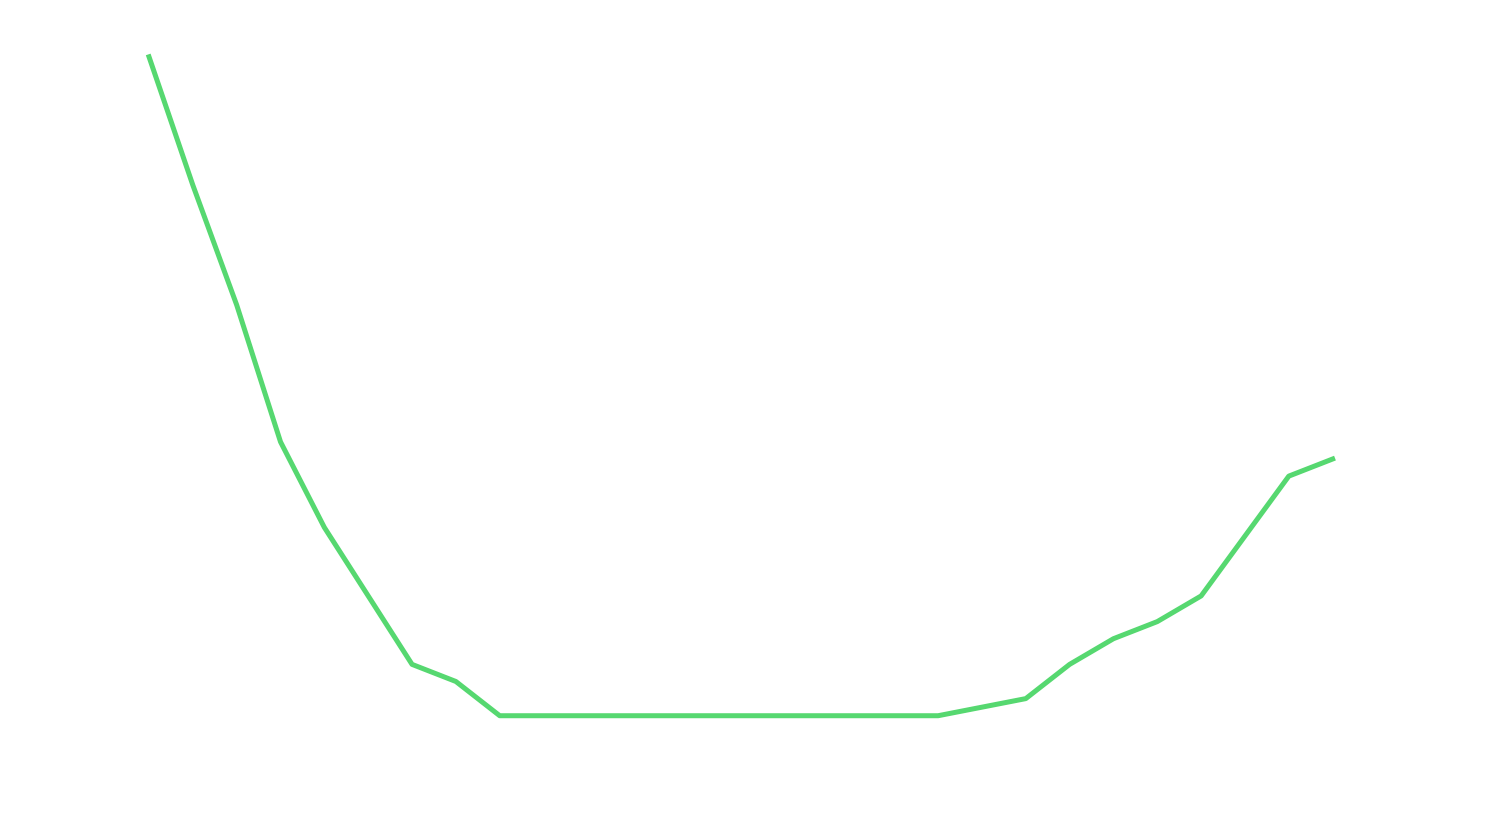

In [13]:
pp.plot(billboard.loc[0, 'x1st.week':'x76th.week'])

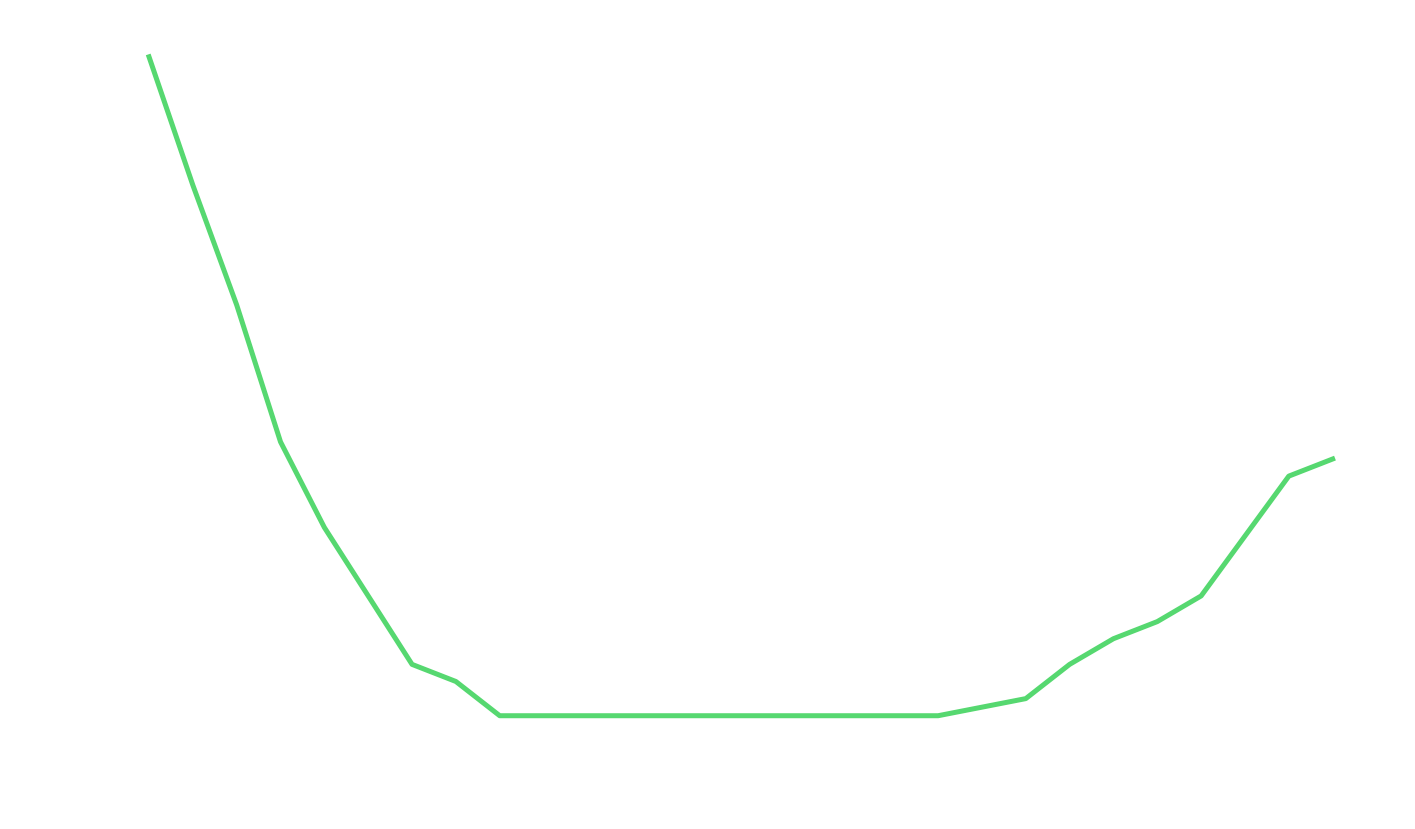

In [15]:
pp.plot(range(1,77),billboard.loc[0, 'x1st.week':'x76th.week'])

In [ ]:
for index, row in billboard.iterrows():